# Assignment 5: PCA and Clustering (40 marks)
### Due: December 6 at 11:59pm 
(Dropbox will remain open until December 8 at 11:59pm)

### Name: 

The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Principle Component Analysis (PCA) (18 marks)

### Step 1. Load data (2 marks)

You have been asked by an agricultural company to help them predict the type of wheat based on kernel characteristics. You have been given all the information you need in the seeds_dataset.txt file on D2L. The original dataset can be found [here](https://archive.ics.uci.edu/dataset/236/seeds)

The first step is to read in the file using pandas and inspect the first few columns. Note that the data is in a text file, so the separator is different compared to a csv file.

In [126]:
# TODO: Import dataset and inspect the first five columns

total_data = pd.read_csv('seeds_dataset.txt', delimiter ='\t', header = None)

total_data.head(5)

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Next, you will need to separate the data into your feature matrix and target vector.

In [127]:
# TODO: Separate the data into feature matrix and target vector. Print the shape of X and y

total_data.columns = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4',
                      'Feature 5', 'Feature 6', 'Feature 7', 'Target Vector']

X = total_data.drop('Target Vector', axis = 1)
y = total_data['Target Vector']

print(X.shape)
print(y.shape)


(210, 7)
(210,)


### Step 2: Preprocessing (2 marks)

To preprocess the data, we will need to scale the data. Which scaler would you select and why? *(1 mark)* 

*ANSWER HERE*

    Eyeballing our dataset, we can see all our feature values have a range from 2-20. Since they are all in a small range we don't need to use MinMaxScaler. We can also see that our dataset has 0 or close to 0 outliers by eyeballing the dataset, thus we don't need to use RobustScaler as well. We don't need to user a Normalizer either because it is usually used for clustering.

    We will use the **StandardScaler**, since all the data seems to have a normal distribution.

Before we implement the scaler, we need to split the data into training and testing sets first.

In [128]:
# TODO: Split the data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [129]:
# TODO: Print the shape of the training feature matrix and target vector

print(X_train.shape)
print(y_train.shape)

(157, 7)
(157,)


Now that we have our training data, we can implement our selected scaler.

In [130]:
# TODO: Scale the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Step 3: Model Selection (1 mark)

The next step is to instantiate our selected model. In this case, we will be using `LogisticRegression()`

In [131]:
# TODO: Instantiate model

from sklearn.linear_model import LogisticRegression

lReg = LogisticRegression(max_iter = 5000)
lReg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=5000)

### Step 4: Validation (2 marks)

To validate the results, we need to use cross-validation. To make sure we are using the best hyperparmeters, we can use a grid search. The parameter grid has been provided below.

In [132]:
param_grid = {'C': [0.01, 0.1, 1.0, 10.0],
             'fit_intercept': [True, False]}

In [133]:
#TODO: Implement the grid search and print the best parameters, cross-validation score and test score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

lr_grid_search = GridSearchCV(lReg, param_grid , cv = 5, n_jobs = -1)
lr_grid_search.fit(X_train_scaled, y_train)

#Best Parameters
print("Best Parameters:", lr_grid_search.best_params_)

#Cross Validation Score mean
print("Cross-Validation Score:", lr_grid_search.best_score_)

#Accuracy Score using scaled data
y_pred_test = lr_grid_search.predict(X_test_scaled)
test_score = accuracy_score(y_test, y_pred_test)
print("Test Score:", test_score)

Best Parameters: {'C': 10.0, 'fit_intercept': True}
Cross-Validation Score: 0.9368951612903226
Test Score: 0.9622641509433962


### Step 5: Visualize using PCA (3 marks)

Now you can visualize the results from Step 4 using PCA. Use the best parameters from the previous step to predict the label for the testing data. For the plot, each data point must be colored based on the class label.

In [134]:
# TODO: Predict y labels using best estimator
# Best Parameters are C = 10, and fit_intercept = true

bestLogReg = LogisticRegression(max_iter = 5000, C = 10, fit_intercept = True)
bestLogReg.fit(X_train_scaled, y_train)

y_pred = bestLogReg.predict(X_test_scaled)

In [135]:
# TODO: Reduce dimensions of test data for plotting

# project 2 components for 2d graph
pca = PCA(2)
X_reduced = pca.fit_transform(X_test_scaled)


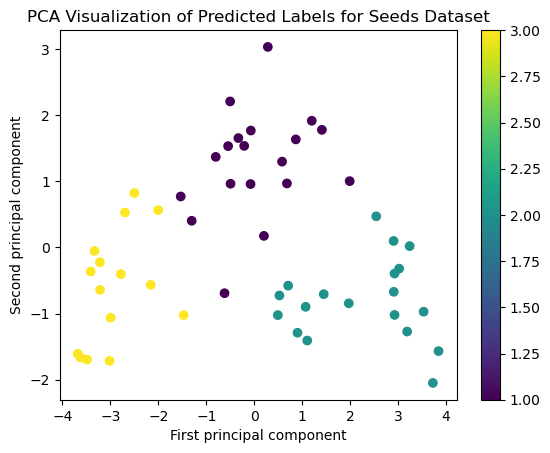

In [136]:
# TODO: Plot test points colored by predicted label

scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c = y_pred, cmap = 'viridis')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('PCA Visualization of Predicted Labels for Seeds Dataset')
plt.colorbar()


#### Questions (4 marks)

1. Did the logistic regression model work well for this dataset? Why would you make this conclusion? *(2 marks)*
1. Did PCA work well for this model? How does this relate to the results from the model used? *(2 marks)*

*ANSWER HERE*

    1. Yes, we got a cross validation score of 0.94 and a test score of 0.96. The test score was slightly higher than training score, indicating to us training and validation score are close together. The test score of 0.96 is also really high. These two characteristics show low bias and low variance.  
      
    2. Yes. Since we got a high test score, we know our model predicted the labels nearly perfectly. We can also see from the graph above that all labels appear to have it's own corner of the graph.  PCA reduces the dimensions of a feature matrix by creating a new vector that represents all features. This means that PCA works particular well with datasets that are linear. This indicates that the dataset is likely linear since PCA and logistical regression worked so well.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

    1. M.Charytanowicz, J. Niewczas, P. Kulczycki, P. Kowalski, S. Lukasik, Sept. 28th/2012, "seeds", UCI Machine Learning Repository. [Online]. Available : https://archive.ics.uci.edu/dataset/236/seeds
      
    2. First I loaded in the dataset. Than I preprocessed the dataset by scaling it using StandardScaler. Afterwords, split the data and instantiated a LogisticalRegression() model. I used a gridsearch to find the best parameters and use cross validation to use all sections of the data for training. Using the best parameters from the grid search I created a new LogisticalRegression() model, and predicted the labels. Afterwords I used PCA() to reduce the dimensions into 2 features and plotted the predicted labels with the principal components.  
      
    3. I did not have to use generative AI. I did not need to modify the code either. I think it's because the previous labs and assignments have helped understand the general structure of creating a model.
       
    4. I did not struggle with this part. I think the previous assignments and labs have helped me understand the concepts behind creating a model and Principal Components.

## Part 2. Implement clustering (20 marks)

The agricultural company approaches you again because they lost all the labels for their data. Use the Kmeans clustering method to assign labels to the seeds dataset used in Part 1.

### Step 1: Cluster using original data (6 marks)

This part of the assignment asks you to implement Kmeans clustering using the orginal feature matrix (after scaling has been performed). 

In [137]:
# TODO: Scale feature matrix
# I assume we want to scale all of X instead of X_train and X_test

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

The first step is to use the elbow method to determine the optimal number of clusters. In this case, you can use the distortion metric.

C:\Users\Ravee\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Ravee\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Ravee\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Ravee\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarn

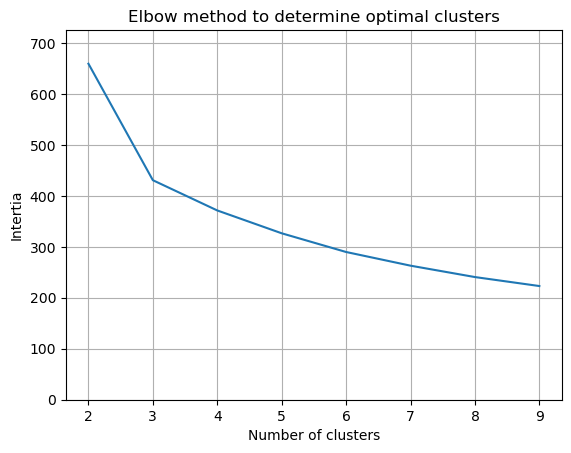

In [138]:
# TODO: Use the elbow method to determine the optimal number of clusters

from sklearn.cluster import KMeans

inertia = []
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters = n_clusters, random_state = 42, n_init= 10).fit(X_scaled)
    inertia.append(kmeans.inertia_ )
    
inertias = pd.DataFrame({'n_clusters': range(2, 10), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters')
plt.ylabel('Intertia')
plt.title('Elbow method to determine optimal clusters')
plt.ylim((0, 1.1 * inertias.inertia.max()))
plt.grid(True)
ax.legend().set_visible(False)

#Note the bend appears to happen with n_clusters = 3

Next, implement Kmeans and calculate the following validation metrics:
- Silhouette score
- Calinski-Harabasz score
- Davies-Bouldin score

In [139]:
# TODO: Implement K-means with the number of clusters determined in the previous step

kmeans_model = KMeans(n_clusters = 3, random_state = 42, n_init= 10).fit(X_scaled)


C:\Users\Ravee\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [140]:
# TODO: Calculate the three different validation metrics

from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

labels = kmeans_model.labels_

sil_score = silhouette_score(X_scaled, labels)
cal_har_score = calinski_harabasz_score(X_scaled, labels)
dav_boul_score = davies_bouldin_score(X_scaled, labels)

print('The Silhouette score is:', sil_score)
print('The Calinski-Harabasz score is:', cal_har_score)
print('The Davies-Bouldin score is:', dav_boul_score)

The Silhouette score is: 0.40072705527512986
The Calinski-Harabasz score is: 249.7841749161647
The Davies-Bouldin score is: 0.9278712249013426


Plot the clustering results using PCA. Remember to color each data point based on the cluster label.

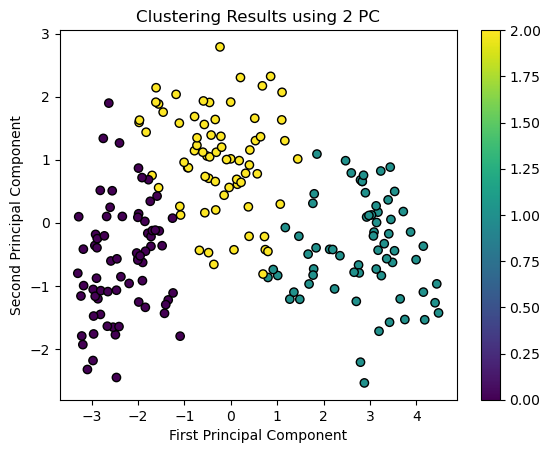

In [141]:
# TODO: Plot clustering results

pca = PCA(2)
X_reduced = pca.fit_transform(X_scaled)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c = labels, cmap = 'viridis', edgecolor='black')
plt.title('Clustering Results using 2 PC')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar()


### Step 2: Cluster using PCA-transformed data (4 marks)

Implement Kmeans clustering using PCA-transformed data. The first step is to use the explained variance ratio to find the number of components required to explain at least 95% of the variance.

In [147]:
# TODO: Find the number of principal components using explained variance ratio

pca = PCA().fit(X_scaled)

# Don't use graph use the attribute explained_variance_ratio of pca 
variance = pca.explained_variance_ratio_.cumsum()
num_of_component = 0
for component in variance:
    if (component >= 0.95):
        break
    else:
        num_of_component += 1

#Since we are starting with index 0 for a principal component of 1 we must add 1 to the result
num_of_component += 1
print('Number of Principal Components Needed:',num_of_component)

Number of Principal Components Needed: 3


Next, transform the data using PCA, implement Kmeans and calculate the three validation metrics used in the previous step.

In [148]:
# TODO: Use PCA to transform the data

pca = PCA(num_of_component).fit(X_scaled)
X_reduced = pca.transform(X_scaled)


In [149]:
# TODO: Implement K-means with the transformed data

kmeans_model = KMeans(n_clusters = 3, random_state = 42, n_init = 10).fit(X_reduced)


C:\Users\Ravee\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [150]:
# TODO: Calculate the three different validation metrics

labels = kmeans_model_pca.labels_

sil_score2 = silhouette_score(X_reduced, labels)
cal_har_score2 = calinski_harabasz_score(X_reduced, labels)
dav_boul_score2 = davies_bouldin_score(X_reduced, labels)

print('The Silhouette score is:', sil_score2)
print('The Calinski-Harabasz score is:', cal_har_score2)
print('The Davies-Bouldin score is:', dav_boul_score2)

The Silhouette score is: 0.4100823639350388
The Calinski-Harabasz score is: 260.2885065635679
The Davies-Bouldin score is: 0.9030688438741872


### Step 3: Display results (2 marks)

Print the results for Steps 2 and 3 in a table. Include column and row labels

In [151]:
# TODO: Display results

results_list = [[sil_score, cal_har_score, dav_boul_score],[sil_score2, cal_har_score2, dav_boul_score2]]
results = pd.DataFrame(results_list, columns=["Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score"],
                       index=['No PCA', 'With PCA'])


results

,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Score
No PCA,0.400727,249.784175,0.927871
With PCA,0.410082,260.288507,0.903069


#### Questions (4 marks)

1. Did the optimal number of clusters make sense based on the context? *(1 mark)*
1. Compare the PCA plot from Part 2 step 1 to the PCA plot from Part 1. Did we get similar results? *(1 mark)*
1. How many components did you use for the PCA analysis? Did using PCA improve your results? Why or why not? *(2 marks)*


*ANSWER HERE*

    1. Yes, if we looked at the original dataset, we could see their are 3 classes. So having our optimal number of clusters be 3 makes sense.  
      
    2. Yes, we did get similar results. The only difference is that the PCA plot in part 1 has less data points then the PCA plot in part 2 because we only used a small portion of the dataset for testing in part 1.  
    
    3. I used 3 components to reach 95% of the variance. Using a PCA did improve my results. The silhouette score is closer to one. My Calinski-Harbasz score is higher with a PCA. My Davies-Bouldin score is closer 1 with a PCA. All these changes indicate a denser and a more well seperated cluser.  
    This is because PCA does dimension redunctionality leading to a more efficent representation of the data. It also helps with clustering problems because a PCA will reduce features and capture most of the variance, in our case 95%. This is helpful with clustering because it leads to better seperation of clusters because a PCA captures the variance directions.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

    1. M.Charytanowicz, J. Niewczas, P. Kulczycki, P. Kowalski, S. Lukasik, Sept. 28th/2012, "seeds", UCI Machine Learning Repository. [Online]. Available : https://archive.ics.uci.edu/dataset/236/seeds  
      
    2. First we applied a StandardScaler() transformation on the whole feature matrix. We then determined the optimal number of clusters using the elbow method. Afterwords, we instantied a Kmeans model with the optimal number of clusters and calculated the silhoutte score, Calinski-Harbasz score, and Davies-Bouldin score. We then plotted the clustering results. For the next part we determined the number of PCA components to capture 95% of the variance. We than reduced the data into the number of PCA components we determined. We than instantiated a Kmeans model, and determined the silhoutte score, Calinski-Harbasz score, and Davies-Bouldin score. Finally, we displayed results of our silhoutte score, Calinski-Harbasz score, Davies-Bouldin score, with a PCA and without a PCA on a dataframe.  
    
    3. I did use chatGPT to help me determine the number of PCA components to capture 95% variance. I did not need to modify my code, I just needed an explantion on "explained_variance_ratio_.cumsum()".  
    
    4. Not really, everything was straight forward. I think looking at the previous labs, slides, and code examples we got helped a lot.

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

    I enjoyed this assignment. It helped me understand PCA a bit more. It also helped me visulaize how and why we would implement unsupervised learning. I found the part of this assignment interesting because we could see the results of using a PCA.